In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings("ignore")

The data contains details for over 18,000 players playing in various football clubs in Europe. It contains information on age, skill rating, wages and player value, etc. The files provided are as folows: 
fifa.csv – data file.
fifa_ variable_information.csv - information on individual variables.

Data Preprocessing:
1.	Import the necessary libraries and read the data.
2.	Drop any columns that you deem unecessary for analysis.
3.	The following columns need to be converted for further analysis:

In [6]:
df1= pd.read_csv('/content/fifa.csv')
df2= pd.read_csv('/content/fifa_+variable_information.csv')
print(df1.shape)
print(df2.shape)

(18207, 60)
(59, 2)


In [7]:
df1.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,Left,5.0,4.0,4.0,Medium/ Medium,Messi,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,Right,5.0,5.0,5.0,High/ Medium,Neymar,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,Right,4.0,3.0,1.0,Medium/ Medium,Lean,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,Right,4.0,5.0,4.0,High/ High,Normal,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [8]:
df2.head()

,ID,unique id for every player
0,Name,name
1,Age,age
2,Photo,url to the player's photo
3,Nationality,nationality
4,Flag,url to players's country flag


In [11]:
#2

df1.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Preferred Foot',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate',
       'Body Type', 'Position', 'Jersey Number', 'Joined', 'Loaned From',
       'Contract Valid Until', 'Height', 'Weight', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause'],
      dtype='object')

In [12]:
df1.dtypes

ID                            int64
Name                         object
Age                           int64
Photo                        object
Nationality                  object
Flag                         object
Overall                       int64
Potential                     int64
Club                         object
Club Logo                    object
Value                        object
Wage                         object
Preferred Foot               object
International Reputation    float64
Weak Foot                   float64
Skill Moves                 float64
Work Rate                    object
Body Type                    object
Position                     object
Jersey Number               float64
Joined                       object
Loaned From                  object
Contract Valid Until         object
Height                       object
Weight                       object
Crossing                    float64
Finishing                   float64
HeadingAccuracy             

In [13]:
df1.isnull().sum().sort_values(ascending=False)

Loaned From                 16943
Release Clause               1564
Joined                       1553
Contract Valid Until          289
Club                          241
Position                       60
Jersey Number                  60
Weak Foot                      48
Crossing                       48
FKAccuracy                     48
Curve                          48
Dribbling                      48
GKReflexes                     48
ShortPassing                   48
HeadingAccuracy                48
Finishing                      48
Weight                         48
Skill Moves                    48
Height                         48
Preferred Foot                 48
BallControl                    48
International Reputation       48
Body Type                      48
Work Rate                      48
LongPassing                    48
Volleys                        48
Acceleration                   48
Positioning                    48
GKPositioning                  48
GKKicking     

In [14]:
dfnew = pd.concat((df1.iloc[:,[0,1,2,4,6,7,8,10,11,12,13,14,15,16,18,19,20,22,23,24,25,26]], df1.iloc[:, 27:60]), axis=1)
dfnew.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Jersey Number,Joined,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,Left,5.0,4.0,4.0,Medium/ Medium,RF,10.0,"Jul 1, 2004",2021,5'7,159lbs,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,Right,5.0,4.0,5.0,High/ Low,ST,7.0,"Jul 10, 2018",2022,6'2,183lbs,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,Right,5.0,5.0,5.0,High/ Medium,LW,10.0,"Aug 3, 2017",2022,5'9,150lbs,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,Right,4.0,3.0,1.0,Medium/ Medium,GK,1.0,"Jul 1, 2011",2020,6'4,168lbs,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,Right,4.0,5.0,4.0,High/ High,RCM,7.0,"Aug 30, 2015",2023,5'11,154lbs,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [15]:
#Weight:
dfnew['Weight']=df1['Weight'].str.split('lbs',expand=True)[0]

In [17]:
dfnew['Weight']=dfnew['Weight'].astype('float')
print(dfnew['Weight'].skew())
dfnew['Weight'].fillna(dfnew['Weight'].median(),inplace=True)

0.21658641498472056


In [19]:
for i in ['Value','Wage','Release Clause']:
    dfnew[i]=df1[i].str.split('€',expand=True)[1]

In [20]:
for i in ['Value','Wage']:
    for j in range(dfnew.shape[0]):
        if dfnew.loc[j,i][-1]=='K':
            dfnew.loc[j,i]=str(float(dfnew.loc[j,i].split('K')[0])*1000)
        elif dfnew.loc[j,i][-1]=='M':
            dfnew.loc[j,i]=str(float(dfnew.loc[j,i].split('M')[0])*1000000)

In [21]:
for i in ['Release Clause']:
    for j in range(dfnew.shape[0]):
        if type(dfnew.loc[j,i]) == str:
            if dfnew.loc[j,i][-1]=='K':
                dfnew.loc[j,i]=str(float(dfnew.loc[j,i].split('K')[0])*1000)
            elif dfnew.loc[j,i][-1]=='M':
                dfnew.loc[j,i]=str(float(dfnew.loc[j,i].split('M')[0])*1000000)

In [23]:
for i in ['Value','Wage','Release Clause']:
    dfnew[i]=dfnew[i].astype('float')

In [24]:
#Height

dfnew['Height'].unique()

array(["5'7", "6'2", "5'9", "6'4", "5'11", "5'8", "6'0", "5'6", "5'10",
       "6'6", "6'1", "5'4", "6'3", "5'5", "6'5", "6'7", "5'3", "5'2",
       "6'8", "5'1", "6'9", nan], dtype=object)

In [25]:
dfnew['Height']= dfnew['Height'].apply(lambda x: float('.'.join(x.split("'"))) if not isinstance(x, float) else x)

In [26]:
dfnew['Height']

0        5.70
1        6.20
2        5.90
3        6.40
4        5.11
         ... 
18202    5.90
18203    6.30
18204    5.80
18205    5.10
18206    5.10
Name: Height, Length: 18207, dtype: float64

##Q4
(You might encounter Nan values in the above columns. Pandas treats Nan values as float. Please keep that in mind when making the conversions.)

4.	Check for missing values and do a mean imputation where necessary.

In [27]:
for i in dfnew.select_dtypes(np.number).columns:
    dfnew[i].fillna(dfnew[i].mean(),inplace=True)

In [28]:
dfnew.select_dtypes(np.number).isnull().sum()

ID                          0
Age                         0
Overall                     0
Potential                   0
Value                       0
Wage                        0
International Reputation    0
Weak Foot                   0
Skill Moves                 0
Jersey Number               0
Height                      0
Weight                      0
Crossing                    0
Finishing                   0
HeadingAccuracy             0
ShortPassing                0
Volleys                     0
Dribbling                   0
Curve                       0
FKAccuracy                  0
LongPassing                 0
BallControl                 0
Acceleration                0
SprintSpeed                 0
Agility                     0
Reactions                   0
Balance                     0
ShotPower                   0
Jumping                     0
Stamina                     0
Strength                    0
LongShots                   0
Aggression                  0
Intercepti

##Exploratory Analysis:

1.	Plot the distribution of Overall rating for all players. 
2.	Generate pair plots for the following variables:
Overall, Value, Wage, International Reputation, Height, Weight, Release Clause
3.	Generate a table containing the top 20 players ranked by Overall score and whose contract expires in 2020.
a)	What would the average wage for this set of players be?
b)	What is the average age?
c)	Is there a correlation between the Overall rating and Value for these players?

4.	Generate tables containing the top 5 players by Overall rating for each unique position.
a)	Are there any players appearing in more than one Table. Please point out such players.
b)	What is the average wage one can expect to pay for the top 5 in every position?

Final Report:
Put all highlights from the information obtained above in a power point presentation containing a maximum of 5 slides. No title slide required.

In [29]:
dfnew['Overall'].unique()

array([94, 92, 91, 90, 89, 88, 87, 86, 85, 84, 83, 82, 81, 80, 79, 78, 77,
       76, 75, 74, 73, 72, 71, 70, 69, 68, 67, 66, 65, 64, 63, 62, 61, 60,
       59, 58, 57, 56, 55, 54, 53, 52, 51, 50, 49, 48, 47, 46])

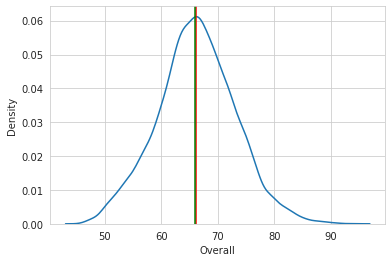

The skewness of Overall rating 0.06718492227833812


In [30]:
#1. :

sns.distplot(dfnew['Overall'],hist=False)
plt.axvline(dfnew['Overall'].mean(),color='r')
plt.axvline(dfnew['Overall'].median(),color='g')

plt.show()

print('The skewness of Overall rating',dfnew['Overall'].skew())

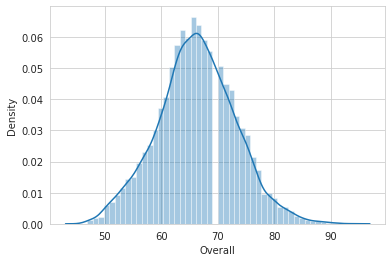

In [31]:
sns.distplot(df1['Overall'])

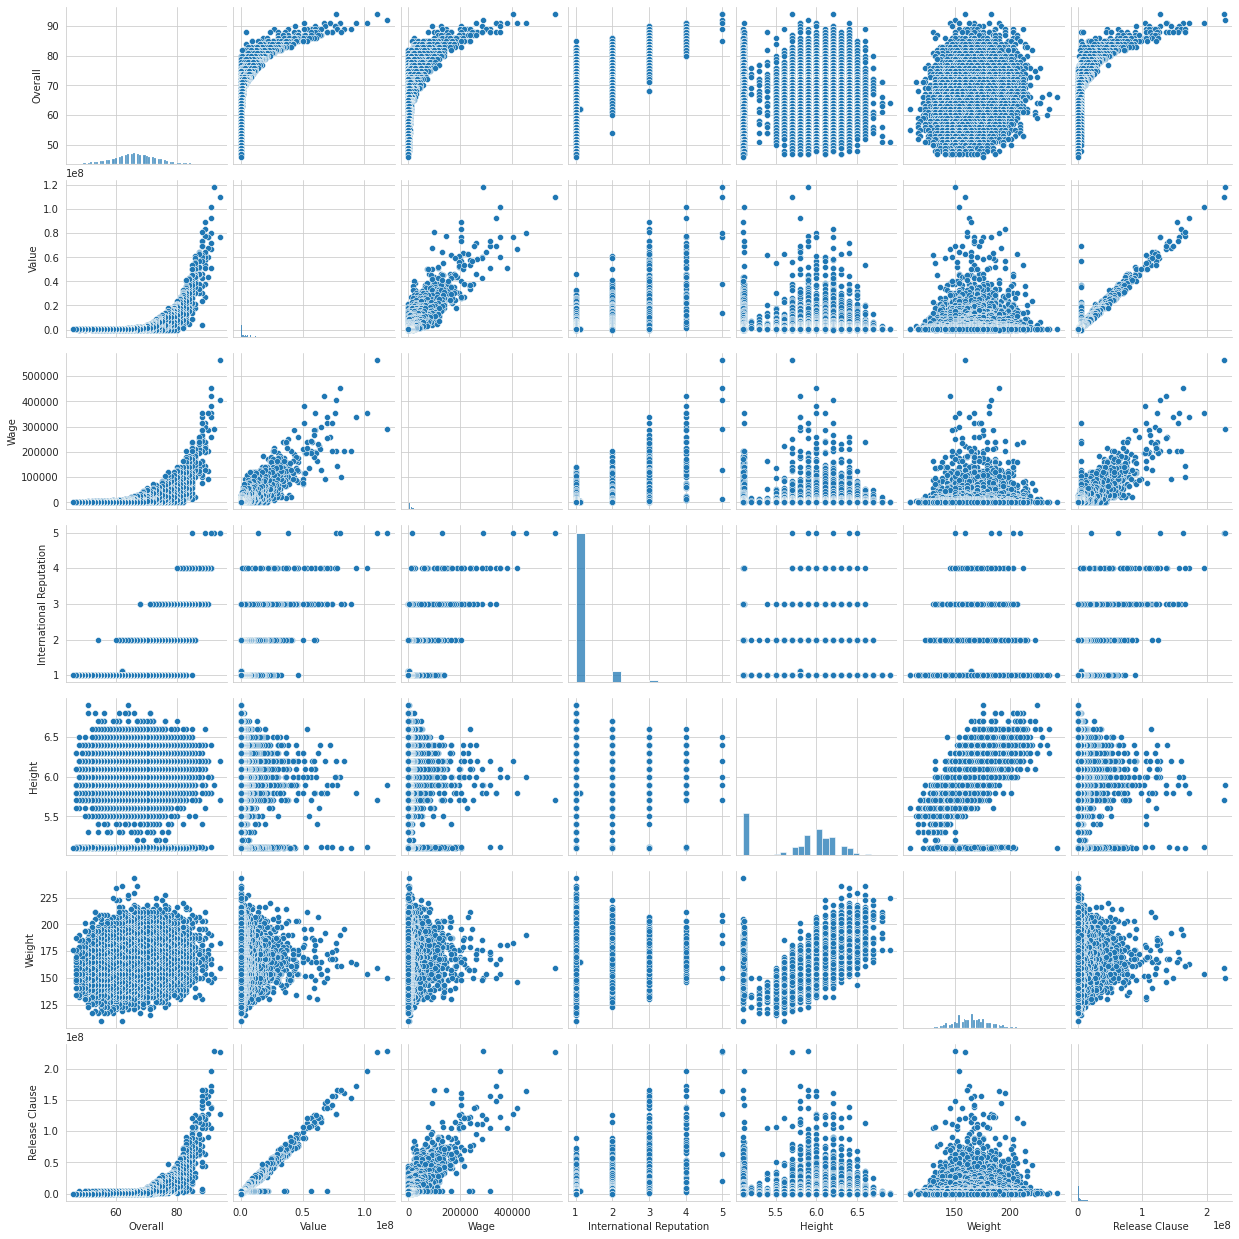

In [32]:
#2

sns.pairplot(dfnew[['Overall',"Value", "Wage","International Reputation", "Height", "Weight", "Release Clause"]])
plt.show()

In [33]:
dfnew.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Jersey Number,Joined,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,Left,5.0,4.0,4.0,Medium/ Medium,RF,10.0,"Jul 1, 2004",2021,5.70,159.0,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,Right,5.0,4.0,5.0,High/ Low,ST,7.0,"Jul 10, 2018",2022,6.20,183.0,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,Right,5.0,5.0,5.0,High/ Medium,LW,10.0,"Aug 3, 2017",2022,5.90,150.0,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0
3,193080,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,Right,4.0,3.0,1.0,Medium/ Medium,GK,1.0,"Jul 1, 2011",2020,6.40,168.0,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,355000.0,Right,4.0,5.0,4.0,High/ High,RCM,7.0,"Aug 30, 2015",2023,5.11,154.0,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0


##3.	Generate a table containing the top 20 players ranked by Overall score and whose contract expires in 2020.
a)	What would the average wage for this set of players be?
b)	What is the average age?
c)	Is there a correlation between the Overall rating and Value for these players?



In [34]:
#3:

df20=dfnew.groupby(by='Contract Valid Until').get_group("2020")

In [35]:
top20=df20.sort_values(by='Overall', ascending=False)[:20]
top20[['ID','Name']]

,ID,Name
3,193080,De Gea
6,177003,L. Modrić
8,155862,Sergio Ramos
5,183277,E. Hazard
13,168542,David Silva
21,179813,E. Cavani
24,138956,G. Chiellini
31,190460,C. Eriksen
39,164240,Thiago Silva
50,175943,D. Mertens


In [36]:
#a:
top20['Wage'].mean()

205450.0

In [37]:
#b:
top20['Age'].mean()

30.65

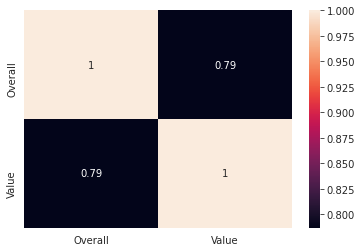

In [38]:
#c:
sns.heatmap(top20[['Overall','Value']].corr(),annot=True)
plt.show()

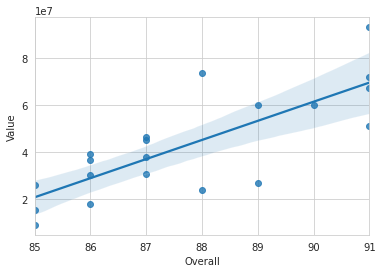

In [39]:
sns.regplot(x='Overall', y='Value', data= top20)
plt.show()
# there is positive correlation

##4.	Generate tables containing the top 5 players by Overall rating for each unique position.
a)	Are there any players appearing in more than one Table. Please point out such players.
b)	What is the average wage one can expect to pay for the top 5 in every position?


In [40]:
top_5 = {}
for i in dfnew['Position'].unique():
  try:
    top_5[i]=list(dfnew.sort_values(by=['Overall','Position'], ascending=[False, True]).groupby(dfnew['Position']).get_group(i)[:5]['Name'].values)
  except KeyError:
    pass

In [41]:
top5=pd.DataFrame(top_5)
top5

,RF,ST,LW,GK,RCM,LF,RS,RCB,LCM,CB,LDM,CAM,CDM,LS,LCB,RM,LAM,LM,LB,RDM,RW,CM,RB,RAM,CF,RWB,LWB
0,L. Messi,Cristiano Ronaldo,Neymar Jr,De Gea,K. De Bruyne,E. Hazard,L. Suárez,Sergio Ramos,T. Kroos,D. Godín,N. Kanté,A. Griezmann,Sergio Busquets,E. Cavani,G. Chiellini,K. Mbappé,J. Rodríguez,P. Aubameyang,Marcelo,P. Pogba,Bernardo Silva,Thiago,Azpilicueta,J. Cuadrado,Luis Alberto,M. Ginter,N. Schulz
1,D. Mertens,R. Lewandowski,L. Insigne,J. Oblak,L. Modrić,P. Dybala,Z. Ibrahimović,Thiago Silva,David Silva,S. Umtiti,Paulinho,C. Eriksen,Casemiro,G. Higuaín,M. Hummels,M. Salah,D. Tadić,S. Mané,Jordi Alba,Illarramendi,R. Sterling,S. Milinković-Savić,Carvajal,H. Ziyech,S. Giovinco,P. Kadeřábek,Granell
2,D. Valeri,H. Kane,Isco,M. ter Stegen,I. Rakitić,Iniesta,Falcao,Piqué,M. Hamšík,M. Benatia,Marquinhos,Roberto Firmino,M. Pjanić,Diego Costa,K. Koulibaly,F. Thauvin,Fabrio Farinha,Douglas Costa,Alex Sandro,I. Gueye,Marco Asensio,Jorginho,K. Walker,Allan Bardinho,A. Milik,S. Coleman,Jonny
3,L. Podolski,S. Agüero,Coutinho,T. Courtois,J. Kimmich,Jonathan Viera,W. Ben Yedder,R. Varane,M. Verratti,N. Otamendi,Lucas Leiva,T. Müller,Fernandinho,A. Gómez,J. Vertonghen,José Callejón,Leo Caldeirinha,M. Reus,D. Alaba,D. De Rossi,R. Mahrez,I. Gündoğan,Sergi Roberto,Jacson Zonta,L. Stindl,D. Caligiuri,J. Hector
4,C. Ciano,G. Bale,L. Sané,M. Neuer,Saúl,S. Blanco,S. Zaza,L. Bonucci,Bruno Fernandes,Naldo,F. de Jong,M. Özil,Fabinho,Gerard Moreno,V. van Dijk,A. Di María,Nicolás Formido,Koke,Filipe Luís,M. Parolo,A. Sánchez,N. Keïta,L. Bender,Sebas Couteira,Raffael,Pablo Maffeo,J. Mojica


In [66]:
#a

df_more= []
for i in top_5.values():
  for j in i:
    df_more.append(j)
dfmore1=pd.DataFrame(df_more, columns=['df_more'])

In [67]:
dfmore1.columns

Index(['df_more'], dtype='object')

In [68]:
dfmore1

,df_more
0,L. Messi
1,D. Mertens
2,D. Valeri
3,L. Podolski
4,C. Ciano
...,...
130,N. Schulz
131,Granell
132,Jonny
133,J. Hector


In [78]:
dfmore1.groupby('df_more').filter(lambda x : x['df_more'].shape[0]>1)

#None of  the players appears more than once

,df_more


In [77]:
dfmore1.value_counts()>1

df_more       
Z. Ibrahimović    False
J. Cuadrado       False
Filipe Luís       False
G. Bale           False
G. Chiellini      False
                  ...  
N. Keïta          False
N. Otamendi       False
N. Schulz         False
Naldo             False
A. Di María       False
Length: 135, dtype: bool

In [80]:
# b

sal= {}
for i in top5.columns:
  h= []
  for j in top5[i]:
    try:
      h.append(*dfnew.loc[dfnew['Name'] == j]['Wage'].values)
    except TypeError:
      pass
  sal[i]= sum(h)

In [82]:
sal

{'CAM': 735000.0,
 'CB': 660000.0,
 'CDM': 900000.0,
 'CF': 237000.0,
 'CM': 498000.0,
 'GK': 964000.0,
 'LAM': 67000.0,
 'LB': 601000.0,
 'LCB': 810000.0,
 'LCM': 922000.0,
 'LDM': 398000.0,
 'LF': 606000.0,
 'LM': 823000.0,
 'LS': 598000.0,
 'LW': 1110000.0,
 'LWB': 171000.0,
 'RAM': 77000.0,
 'RB': 530000.0,
 'RCB': 1155000.0,
 'RCM': 1127000.0,
 'RDM': 525000.0,
 'RF': 740000.0,
 'RM': 657000.0,
 'RS': 206000.0,
 'RW': 795000.0,
 'RWB': 221000.0,
 'ST': 1265000.0}

In [84]:

# Players for  Brussels United FC

for i in top5.columns:
      print(top5[i][0])

L. Messi
Cristiano Ronaldo
Neymar Jr
De Gea
K. De Bruyne
E. Hazard
L. Suárez
Sergio Ramos
T. Kroos
D. Godín
N. Kanté
A. Griezmann
Sergio Busquets
E. Cavani
G. Chiellini
K. Mbappé
J. Rodríguez
P. Aubameyang
Marcelo
P. Pogba
Bernardo Silva
Thiago
Azpilicueta
J. Cuadrado
Luis Alberto
M. Ginter
N. Schulz
